In [3]:
import cv2 as cv
import numpy as np
from math import atan2, cos, sin, sqrt, pi

def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    ## [visualization1]
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    ## [visualization1]

def getOrientation(pts, img):
    ## [pca]
    # Construct a buffer used by the pca analysis
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]

    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)

    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    ## [pca]

    ## [visualization]
    # Draw the principal components
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)

    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    ## [visualization]

    return angle

## [pre-process]

In [1]:
import matplotlib.pyplot as plt

In [5]:
src = cv.imread(cv.samples.findFile('pca_test1.jpg'))
# Check if image is loaded successfully
if src is None:
    print('Could not open or find the image: ', args.input)
    exit(0)

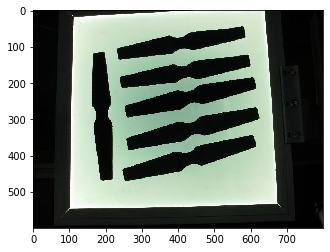

In [6]:
import matplotlib.pyplot as plt
plt.imshow(src)

In [9]:
# Convert image to grayscale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Convert image to binary
# 흑백으로 컨버젼 
_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
## [pre-process]

## [contours]
# Find all the contours in the thresholded image
contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv.contourArea(c);
    # Ignore contours that are too small or too large
    if area < 1e2 or 1e5 < area:
        continue

    # Draw each contour only for visualisation purposes
    cv.drawContours(src, contours, i, (0, 0, 255), 2);
    # Find the orientation of each shape
    getOrientation(c, src)
## [contours]

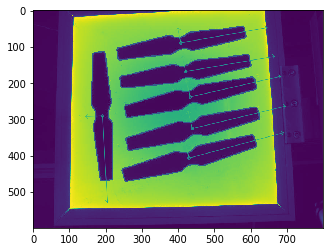

In [12]:
plt.imshow(gray)

In [8]:
cv.imshow('output', src)
cv.waitKey()

-1